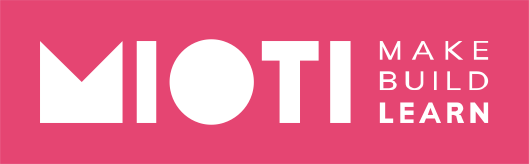
# EJERCICIOS TRABAJO EN EQUIPO
Los alumnos, por grupo, deberán entregar, una challenges por cada grupo. Se usará para su resolución Python.

*Nombre Equipo*: 

- ### PYTHONEROS

Miembros del equipo:

- ### EFRAIN GONZALEZ

- ### PABLO SAGRERA

# Ejercicio 1
La siguiente tabla muestra información sobre la edad y la presión sanguínea de 10 mujeres:
edad:(56, 42, 72,  36, 63, 47, 55, 47, 38, 42)
presion:(148, 126, 159, 118, 149, 130, 151, 142, 114, 141)
Supongamos que nuestro objetivo es determinar la edad de una mujer a partir de su presión sanguínea o, lo que es lo mismo, supongamos que la variable dependiente es edad y que la variable independiente es presión. 
Representar el diagrama de dispersión de las dos variables para determinar si la relación existente entre ambas puede considerarse lineal, y por tanto, tiene sentido plantear un modelo de regresión lineal simple.


In [1]:
# Se definen las librerias que se utilizarán

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Definimos los datos de edad y presion

edad = np.array([56, 42, 72, 36, 63, 47, 55, 47, 38, 42])
presion = np.array([148, 126, 159, 118, 149, 130, 151, 142, 114, 141])

x = presion
y = edad
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     28.39
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           0.000704
Time:                        15:21:03   Log-Likelihood:                -30.551
No. Observations:                  10   AIC:                             65.10
Df Residuals:                       8   BIC:                             65.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.5440     17.613     -2.472      0.039     -84.159      -2.929
x1             0.6774      0.127      5.328      0.001       0.384       0.971
==============================================================================
Omnibus:                        0.380   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.384
Skew:                          -0.346   Prob(JB):                        0.825
Kurtosis:                       2.335   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
B0, B1 = model.params
print("Linea de mejor ajuste: Y = {0} + {1}*X".format(B0,B1))

Linea de mejor ajuste: Y = -43.54402824083161 + 0.6773877230829579*X


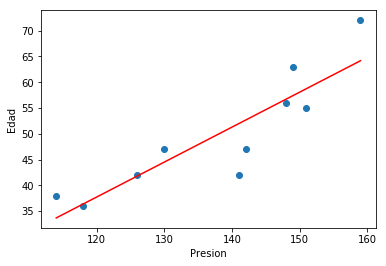

In [4]:
x = presion
x2 = np.linspace(x.min(), x.max(), 100)
y_pred = x2 * B1 + B0

plt.scatter(x, y, alpha=1) #grafica el scatter plot
plt.plot(x2, y_pred, 'r', alpha=1) # la linea de regresion en rojo
plt.xlabel('Presion')
plt.ylabel('Edad')
plt.show()

Text(0,0.5,'Residules')

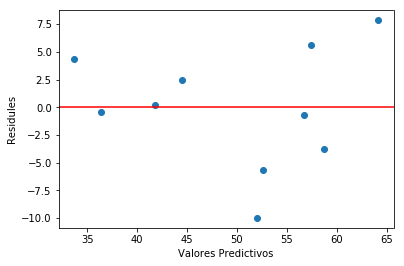

In [5]:
# En el siguiente grafico cruzaremos los valores del modelo con los residuos, para evaluar la Heteroscedasticidad

# Esto seria viendo si existe una la varianza aumenta a medida que aumenta el valor predictivo

x = presion
y = edad
x = sm.add_constant(x)
y_pred=model.predict(x)
y_pred

plt.scatter(y_pred, model.resid)
plt.axhline(0, color='red')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residules')

In [6]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('La relación no es heteroscedástica')
if breusch_pagan_p < 0.05:
    print('La relación es heteroscedástica')

0.1905216387768781
La relación no es heteroscedástica


 Dado el grafico de dispersion , podriamos afimar que si podemos plantear un problema de regresion lineal. A priori parece que hay cierta relacion lineal entre las variables.

El coeficiente de determinacion r cuadrado es de 0.78, con lo que calidad del modelo a la hora de precedir no sera del todo precisa.

La muestra es homocedástica, lo que indica que la varianza del error condicional a las variables explicativas es constante a lo largo de las observaciones. Esta es una propiedad fundamental de los modelos de regresion lineal.

En este modelo el parametro B0, desde el punto de vista fisico o real ,no tiene sentido puesto que seria el valor de la presion para un persona de 0 anos 
El parametro B1 , indica que, por término medio, cada ano de edad supone un incremento de 0.677 en la presion.

# Ejercicio 2
Con el conjunto de datos de *cars.csv* estudiar si hay relación lineal entre la variable dist y la variable speed. 
Construye el modelo lineal y muestra la función lineal resultante
¿Puedes hacer algún tipo de predicción? Comenta los resultados

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd  # To read data
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

df2 = pd.read_csv('cars.csv', sep=';').set_index('Unnamed: 0')

dist = df2['dist'].values.reshape(-1, 1)  # values converts it into a numpy array
speed = df2['speed'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

x = sm.add_constant(dist)
y = speed

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.49e-12
Time:                        15:21:03   Log-Likelihood:                -127.39
No. Observations:                  50   AIC:                             258.8
Df Residuals:                      48   BIC:                             262.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2839      0.874      9.474      0.000       6.526      10.042
x1             0.1656      0.017      9.464      0.000       0.130       0.201
==============================================================================
Omnibus:                        0.720   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.827
Skew:                          -0.207   Prob(JB):                        0.661
Kurtosis:                       2.526   Cond. No.                         98.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
B0, B1 = model.params
print("Linea de mejor ajuste: Y = {0} + {1}*X".format(B0,B1))

Linea de mejor ajuste: Y = 8.283905641787177 + 0.16556757464431895*X


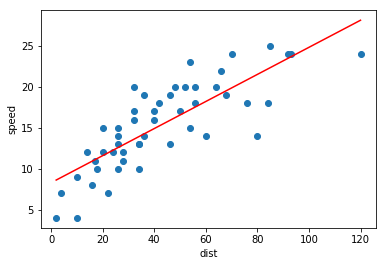

In [9]:
x = dist
x2 = np.linspace(x.min(), x.max(), 100)
y_pred = x2 * B1 + B0

plt.scatter(x, y, alpha=1) #grafica el scatter plot
plt.plot(x2, y_pred, 'r', alpha=1) # la linea de regresion en rojo
plt.xlabel('dist')
plt.ylabel('speed')
plt.show()

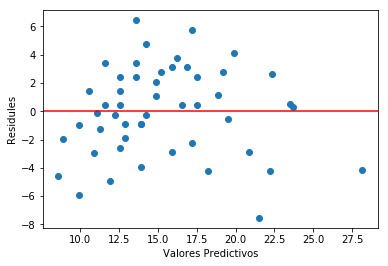

In [10]:
# En el siguiente grafico cruzaremos los valores del modelo con los residuos, para evaluar la Heteroscedasticidad

# Esto seria viendo si existe una la varianza aumenta a medida que aumenta el valor predictivo

dist = df2['dist'].values.reshape(-1, 1)  # values converts it into a numpy array
speed = df2['speed'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

x = sm.add_constant(dist)
y_pred=model.predict(x)

plt.scatter(y_pred, model.resid)
plt.axhline(0, color='red')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residules')
plt.show()

In [11]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('La relación no es heteroscedástica')
if breusch_pagan_p < 0.05:
    print('La relación es heteroscedástica')

0.3977174781694164
La relación no es heteroscedástica


Viendo el grafico de dispersion, al igual que en el primer apartado, podemos plantear un problema de regresion lineal, y ver si existe relacion entre las variables distancia y velocidad.

Una vez entrenado el modelo y sacadas algunas estadisticas, vemos que si existe cierta dependencia, aunque con un coeficiente de determinacion un poco bajo (0,65). Las predicciones son seran muy ajustadas.
La muestra tambien es homocesdastica.

El parametro B0,desde el punto de vista fisico o real no tiene sentido, puesto que seria la distancia recorrida para una velocidad de 0 (-17.579).
El parametro B1 nos muestra que por cada unidad de distancia recorrida la velocidad aumenta de media 3.932 unidades 

# Ejercicio 3
Como responsable de una empresa, nos piden evaluar que máquina debemos comprar. Para ello nos dan 4 posibles opciones. 
Cada máquina la tenemos trabajando un numero de horas (variable x) y por cada registro de numero de horas trabajada nos da un valor (variable y) de metros cubicos de tierra que saca. 

Basándonos en los datos que tenemos. Saca una conclusión de que maquina (variable Group) es mejor. 
Para ello haz una regresión lineal por cada máquina (variable Group)

Datos de entrada: datos_ejercicio3.csv


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Tue, 14 Apr 2020   Prob (F-statistic):            0.00216
Time:                        15:22:06   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.0

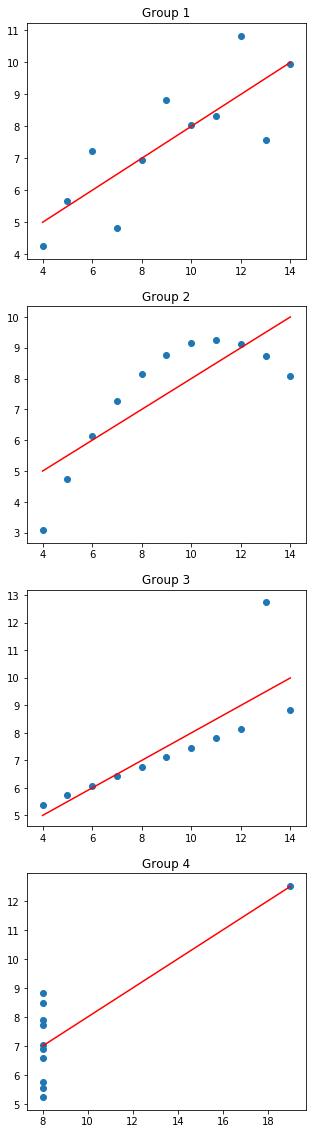

In [14]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

df3 = pd.read_csv('datos_ejercicio3.csv', sep=';')

groups = df3.groupby('group')

fig, axs = plt.subplots(groups.ngroups,figsize=(5,20))

i=0
for name, group in groups:
    print (model.summary())
    print('Analisis del Grupo: {0}'.format(name))
    x=group['x'].values.reshape(-1, 1)
    y=group['y'].values.reshape(-1, 1)
    
    x_tmp = sm.add_constant(x)
    model = sm.OLS(y, x_tmp).fit()
    
    B0, B1 = model.params
    x2 = np.linspace(x.min(), x.max(), 100)
    y_pred = x2 * B1 + B0

    print("  Linea de mejor ajuste para Group {2}: Y = {0} + {1}*X".format(B0,B1,name))
    
    axs[i].plot(x2, y_pred, 'r', alpha=1)
    axs[i].scatter(x, y, alpha=1)
    axs[i].set_title('Group '+ str(name))

    breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
    if breusch_pagan_p > 0.05:
        print('  La relación del grupo {0} no es heteroscedástica'.format(name))
    if breusch_pagan_p < 0.05:
        print('  La relación del grupo {0} es heteroscedástica'.format(name))
    
    i=i+1

print()
print('A continuacion las graficas de cada grupo')

Dentro de los cuatro grupos que tenemos, el grupo 2, viendo su grafico de dispersion se asemeja a una relacion logaritmica pero en ningun caso lineal.

El grupo 4 tampoco tiene ningun tipo de relacion lineal
Por contra, los grupos 1 y 3 si presentan una relacion lineal. Ambos tienen un coeficiente de determinacion similar (0.667), ambas muestras son homocesdasticas, por lo tanto seria vu